# 6.2 Exploring relationship

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
matplotlib.__version__

'3.7.2'

In [56]:
# Define path
path = r'C:\Users\turne\Chocolate Rating'

In [57]:
# import data
df = pd.read_csv(os.path.join(path, 'Original Data','Chocolate_clean.csv'), index_col = False)

### 2. Data Cleaning

In [58]:
df.shape

(1795, 10)

In [59]:
df.head()

,Unnamed: 0,Company Name,Bar Name,REF,Review Date,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [60]:
df.columns

Index(['Unnamed: 0', 'Company Name', 'Bar Name', 'REF', 'Review Date',
       'Cacao Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

In [69]:
# Dropping unneeded columns and creating data subset
chocolate_sub = df.drop(['Unnamed: 0','Company Name', 'Bar Name', 'REF', 'Company Location', 'Bean Type', 'Bean Origin'], axis = 1)

In [70]:
chocolate_sub.head()

,Review Date,Cacao Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


### 3. Exploring Relationships

### Creating Matrix Heatmap

In [45]:
# Change data type
chocolate_sub = pd.Series(['63', '70', '90'])
numbers = pd.to_numeric(chocolate_sub)

In [47]:
string= "3.141"
  
print(string) 
print(type(string)) 
  
# syntax - float() 
Float = float(string)   
  
print(Float) 
print(type(Float))

3.141
<class 'str'>
3.141
<class 'float'>


In [71]:
# Creating correlation table between variables
chocolate_sub.corr()

,Review Date,Cacao Percent,Rating
Review Date,1.000000,0.038219,0.099846
Cacao Percent,0.038219,1.000000,-0.165035
Rating,0.099846,-0.165035,1.000000


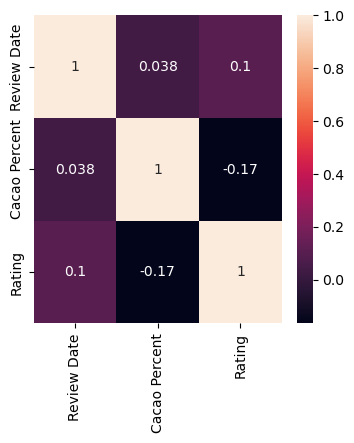

In [72]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(4,4))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(chocolate_sub.corr(), annot = True, ax = ax)

In [101]:
# Saving Visualization
corr.figure.savefig(os.path.join(path, 'Visualizations', 'chocolate_heatmap.png'))

## Question 3 - Answer
Based on the heatmap, there is a weak or poor relationship between the 3 variables: Rating, Cacao Percent, and Review Date.  The Review Date refers to the year of the review, so the ratings or the cacao percentage has no strong relationship on the reviews, and vice versa. I can also interpret that there are other major factors that play into the chocolate ratings besides the cacao percent.

### Creating a Scatterplot

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


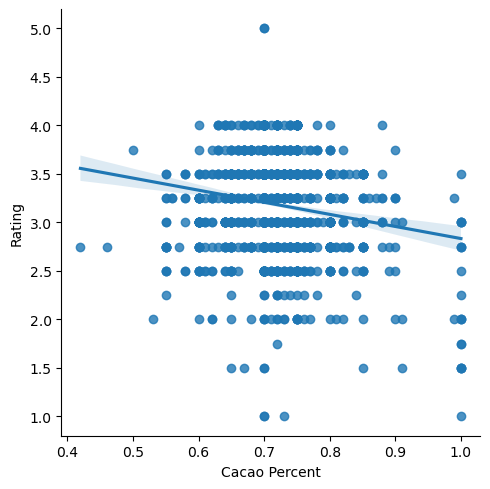

In [74]:
# Scatterplot of most correlated variables
# Cacao Percent and Rating

sns.lmplot(x = 'Cacao Percent', y = 'Rating', data = df)

## Question 4 - Answer 
The scatterplot trend shows a descending correlation of the Ratings as the Cacao Percent in the chocolate slowly raises, when in fact the low ratings and higher the Cacao Percent make up the majority of the data.

### Creating a Pair Plot

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


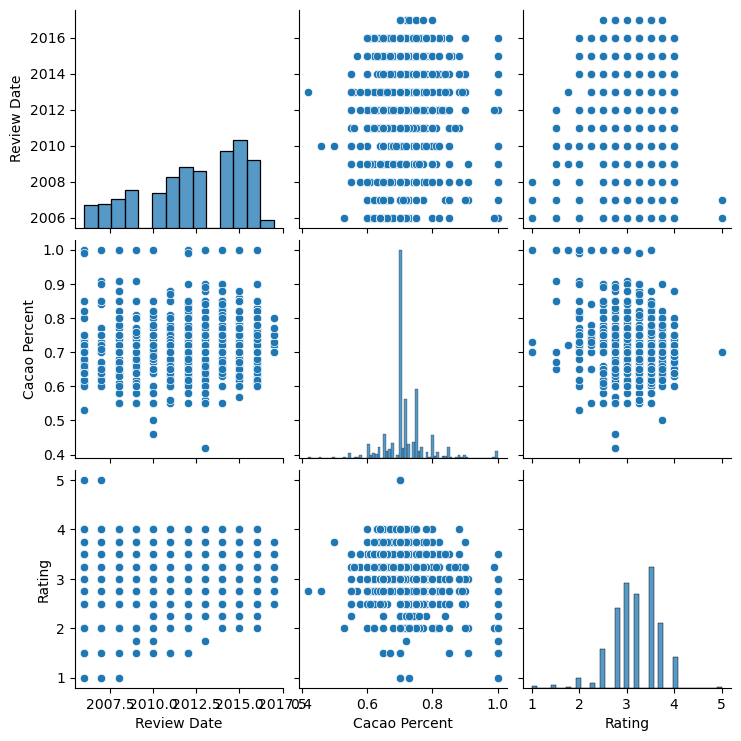

In [75]:
# Creating a pairplot
pair_plot = sns.pairplot(chocolate_sub)

## Question 5 - Answer 
The plots show exactly what I was anticipating; the average rating for the chocolate is around a 3 out of 5.  That's a good rating for chocolate. Of course, perfect ratings of 4+ are less likely. The most common Cacao Percentage in a chocolate bar is from 60%-80%.  The higher the percentage, the more bitter the chocolate is, yet the Ratings are respectably high.  An interesting observation: the only 1-Ratings & 5-Ratings were in 2006-2008. This tells me that the quality of the chocolate improved over the years, or the rating standards changed in order to give higher ratings. 

### Creating a Categorical Plot

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

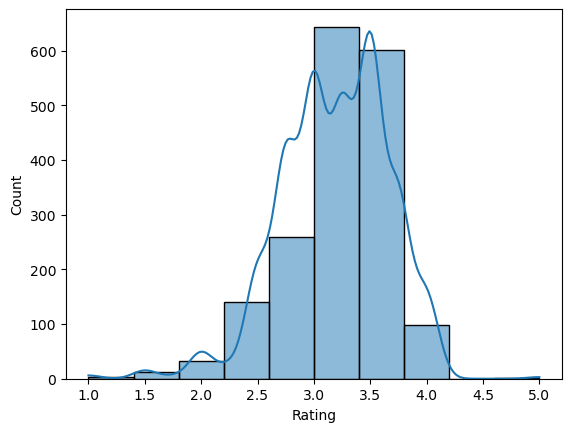

In [77]:
# Creating a histogram to see distribution
sns.histplot(df['Rating'], bins = 10, kde = True)

In [78]:
# Creating score category for categorical plot
df.loc[df['Rating'] < 2 , 'Score category'] = 'Low score'

In [79]:
df.loc[(df['Rating'] >= 2) & (df['Rating'] < 3.75), 'Score category'] = 'Middle score'

In [80]:
df.loc[df['Rating'] >= 3.75, 'Score category'] = 'High score'

In [81]:
df['Score category'].value_counts(dropna = False)

Score category
Middle score    1468
High score       310
Low score         17
Name: count, dtype: int64

In [82]:
1469 + 310 + 17

1796

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


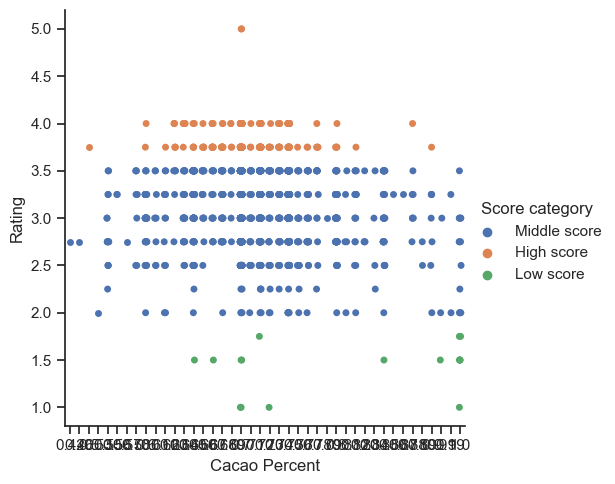

In [83]:
# Creating categorical plot with Rating Score & Cacao Percent
sns.set(style="ticks")
cat_plot_cacao_percent = sns.catplot(x='Cacao Percent', y='Rating', hue="Score category", data=df)

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


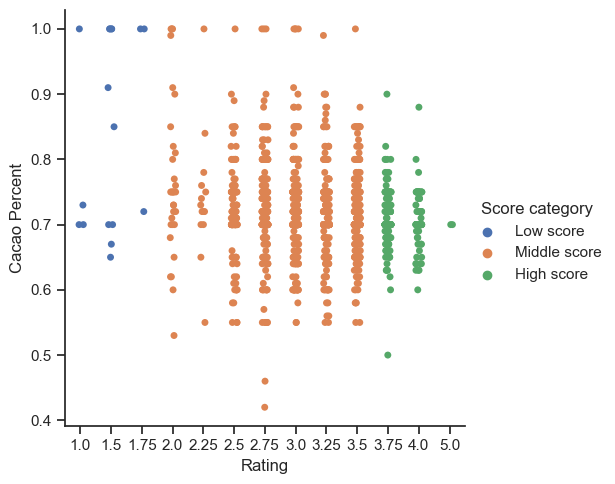

In [84]:
# Creating categorical plot with Rating Score & Cacao Percent
sns.set(style="ticks")
cat_plot_cacao_percent_2 = sns.catplot(x='Rating', y='Cacao Percent', hue="Score category", data=df)

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


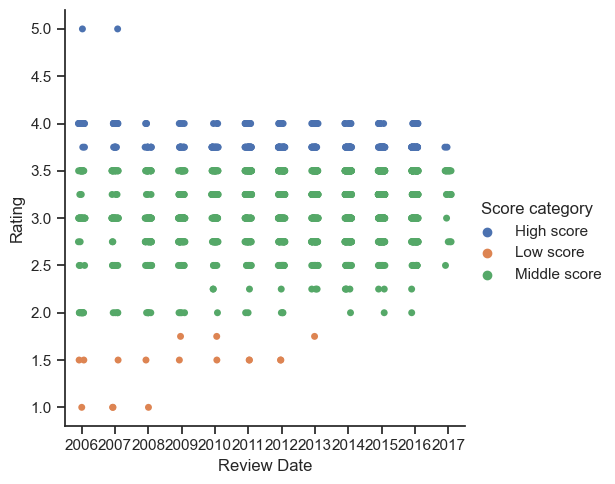

In [85]:
# Creating categorical plot with Review Date & Rating
sns.set(style="ticks")
cat_plot_review_date = sns.catplot(x='Review Date', y='Rating', hue="Score category", data=df)

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


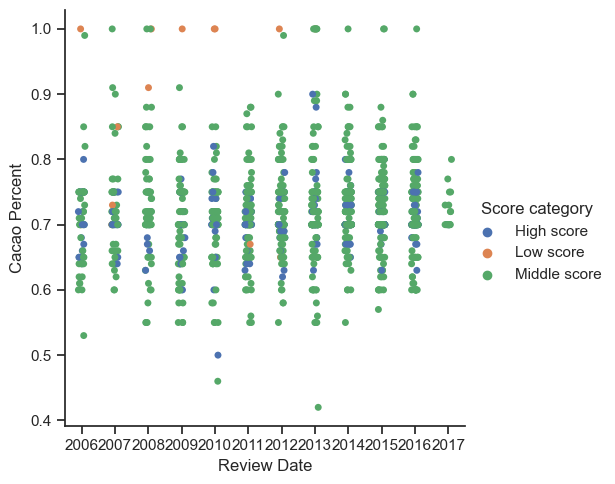

In [90]:
# Creating categorical plot with Review Dates & Cacao Percent
sns.set(style="ticks")
cat_plot_cacao_percent_dates = sns.catplot(x='Review Date', y='Cacao Percent', hue="Score category", data=df)

## Question 6 - Answer 
I wanted to test different perspectives with the Categorical Plots, and some of them answered my questions from exercise 6.1.  
Each review year had a low score, middle score and high score rating.  That tells me there was no bias in the rating process.   
There are a few outliers in the ratings and Cacao Percent.  Those few outliers tell me that those chocolate bars were truly low quality or cacao percent when the rest of data collection was higher quality or had higher cacao percent.

## Research Questions and Hypothesis Discussion
What cacao percent has the highest ratings? The high score of at least 3.75 has 60-80% cacao. In my opinion of quality chocolate, that is spot on what I was expecting. 
A new question that arose during this process: Did the Review Dates have any affect on the ratings?  And the answer to that question was no.  Each score category was more than covered each year by different chocolates with high and low cacao percentage. 
Many of my remaining questions rely on the locations, such as where the chocolate is from, or where the chocolate was made.  Of the 4 types of cacao beans, I have yet to determine which cacao bean produces the highest and lowest rated chocolate. Which leads me to my hypothesis:
    
Hypothesis: If the countries closer to the equator produce better cocoa beans (including the cacao percentage), then those countries would produce high chocolate ratings.    